More efficient parameter tunning using GridSearchCV
: Allow us to define a grid of parameter that will be searched using K-fold cross validation

In [ ]:
# -*- coding: utf-8 -*-
# Indentation: Jupyter Notebook

'''
sklearn exploration
'''

__version__ = 1.0
__author__ = "Sourav Raj"
__author_email__ = "souravraj.iitbbs@gmail.com"


In [12]:
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_iris

In [13]:
data = load_iris()

In [15]:
x = data.data

In [16]:
y = data.target

In [3]:
k_range = range(1,31)

In [5]:
print k_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [6]:
param_grid = dict(n_neighbors = k_range)

In [7]:
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [10]:
grid= GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [17]:
grid.fit(x,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [18]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [22]:
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]

In [27]:
print grid_mean_scores

[0.96, 0.9533333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.98, 0.9733333333333334, 0.98, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.96, 0.9666666666666667, 0.96, 0.9666666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


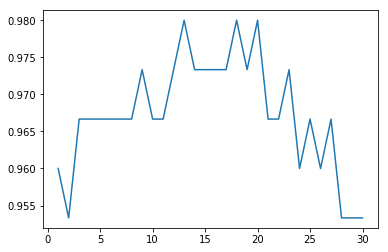

In [31]:
plt.plot(k_range, grid_mean_scores)

examine the best model

In [32]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


# Searching multiple parameters simulataneously
define the parameter values that should be searched


In [33]:
k_range = range(1,31)
weight_option = ['uniform', 'distance']

In [35]:
param_grid = dict(n_neighbors =k_range, weights=weight_option)
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [36]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [37]:
grid.fit(x,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [39]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [40]:
print grid.best_score_
print grid.best_params_

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


# use the best parameters to make predictions

In [43]:
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')

In [44]:
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [45]:
knn.predict([3,5,4,2])

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [46]:
# GridSearchCV automatically refits the best model using all data
grid.predict([3,5,4,2])

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [47]:
from sklearn.grid_search import RandomizedSearchCV

In [56]:
param_dist = dict(n_neighbors=k_range, weights=weight_option)

In [57]:
#n_iter controls the number of searches

In [58]:
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

In [59]:
rand.fit(x,y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          scoring='accuracy', verbose=0)

In [60]:
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16, 'weights': 'distance'},
 mean: 0.96667, std: 0.03333, params: {'n_neighbors': 22, 'weights': 'uniform'},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 18, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 27, 'weights': 'uniform'},
 mean: 0.95333, std: 0.04269, params: {'n_neighbors': 29, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 10, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 22, 'weights': 'distance'},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14, 'weights': 'uniform'},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 12, 'weights': 'distance'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15, 'weights': 'uniform'}]

In [61]:
print rand.best_score_
print rand.best_params_

0.98
{'n_neighbors': 18, 'weights': 'uniform'}


In [62]:
best_scores =[]
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(x,y)
    best_scores.append(round(rand.best_score_, 1))
print best_scores

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
